In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd

# Comparação

Comparação entre os seguintes métodos:
<br>CMAES
<br>(15+105)-ES isotrópico
<br>(15+105)-ES não isotrópico
<br>DE


# GRN com 5 variáveis

In [2]:
# carrega os dados
cmaes_grn5_old_limits = pd.read_csv('../results/GRN5-CMAES-1050000.csv')
cmaes_grn5_new_limits = pd.read_csv('../results/GRN5-CMAES-1050000-new-limits.csv')
cmaes_grn5_new_limits2 = pd.read_csv('../results/GRN5-CMAES-1050000-new-limits2.csv')
de_grn5_new_limits2 = pd.read_csv('../results/GRN5-DE-1050000-new-limits2.csv')


# calcula as estatísticas da coluna 'eval'
cmaes_grn5_old_limits_eval_desc = cmaes_grn5_old_limits.describe()['eval']
cmaes_grn5_new_limits_eval_desc = cmaes_grn5_new_limits.describe()['eval']
cmaes_grn5_new_limits2_eval_desc = cmaes_grn5_new_limits2.describe()['eval']
de_grn5_new_limits2_eval_desc = de_grn5_new_limits2.describe()['eval']

cmaes_grn5_new_limits2.describe()

,seed,eval,time,numEvals,tau0,tau1,tau2,tau3,tau4,k0,...,k5,k6,n0,n1,n2,n3,n4,n5,n6,x
count,30.000000,30.000000,30.000000,3.000000e+01,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,14.500000,6.072454,3460.833333,1.050021e+06,1.546427,2.010232,1.872981,2.541789,2.991379,0.670818,...,0.355387,0.674225,15.923477,5.920951,2.952792,6.158412,12.316352,6.300437,8.348770,6.072454
std,8.803408,0.327899,165.644423,4.437173e+00,0.051494,0.150984,0.496137,0.552789,1.072816,0.043274,...,0.301799,0.293901,4.760001,0.651528,0.653154,4.694057,7.407549,7.595691,6.150100,0.327899
min,0.000000,5.678367,3058.000000,1.050012e+06,1.471757,1.675014,1.050672,1.985416,1.196094,0.597690,...,0.010000,0.010000,9.076269,4.652796,2.047631,3.142791,4.256376,1.042798,2.691920,5.678367
25%,7.250000,5.803272,3365.750000,1.050018e+06,1.500344,1.920276,1.459337,2.116181,1.704811,0.653974,...,0.049273,0.512311,13.386498,5.497547,2.242198,3.695625,8.353783,1.486817,4.836937,5.803273
50%,14.500000,5.923921,3522.000000,1.050022e+06,1.540386,2.014447,1.967622,2.343894,3.370068,0.667022,...,0.300173,0.787893,15.026382,5.940812,2.947133,3.994472,9.352064,1.718251,5.775619,5.923921
75%,21.750000,6.376281,3591.750000,1.050024e+06,1.578352,2.136648,2.276975,2.824639,3.666935,0.686477,...,0.671723,0.901364,18.016764,6.449888,3.440063,6.617039,12.892354,12.521478,9.850281,6.376280
max,29.000000,6.781338,3623.000000,1.050028e+06,1.665267,2.246227,2.676406,3.902169,4.879019,0.745234,...,1.000000,0.950715,29.151677,7.041880,4.267558,22.521592,29.992089,23.042553,28.244283,6.781338


In [3]:

desc = pd.DataFrame({'Old (CMAES)': cmaes_grn5_old_limits_eval_desc, 'new (CMAES)': cmaes_grn5_new_limits_eval_desc, 'new2 (CMAES)': cmaes_grn5_new_limits2_eval_desc, 'new2(DE)': de_grn5_new_limits2_eval_desc})

desc

,Old (CMAES),new (CMAES),new2 (CMAES),new2(DE)
count,30.000000,30.000000,30.000000,30.000000
mean,6.351584,25.952564,6.072454,6.080908
std,0.898934,11.553984,0.327899,0.486541
min,5.609062,5.965791,5.678367,5.681646
25%,5.853889,18.836951,5.803272,5.754498
50%,6.083585,22.763731,5.923921,5.877736
75%,6.392207,36.072490,6.376281,6.251026
max,9.891999,46.836590,6.781338,7.342598


In [4]:
cmaes_grn5_old_limits_evals = cmaes_grn5_old_limits['eval']
cmaes_grn5_new_limits_evals = cmaes_grn5_new_limits['eval']
cmaes_grn5_new_limits2_evals = cmaes_grn5_new_limits2['eval']
de_grn5_new_limits2_evals = de_grn5_new_limits2['eval']


### Comparando novos limites (bem amplos) com os limites antigos (CMAES)

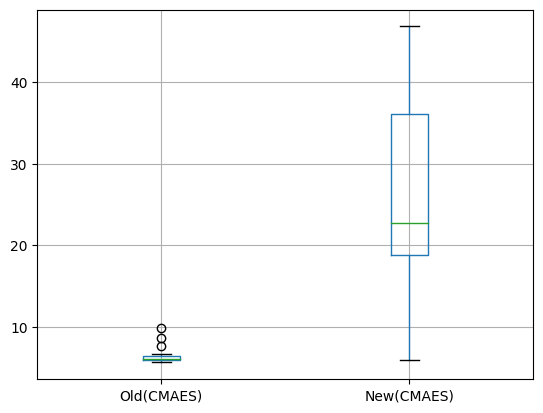

In [5]:

all_evals_grn5 = pd.DataFrame({'Old(CMAES)': cmaes_grn5_old_limits_evals, 'New(CMAES)': cmaes_grn5_new_limits_evals})
all_evals_grn5.boxplot(column=['Old(CMAES)', 'New(CMAES)'])
plt.show()

### Comparando novos limites (mais restritos que os do experimento acima) com os limites antigos (CMAES)

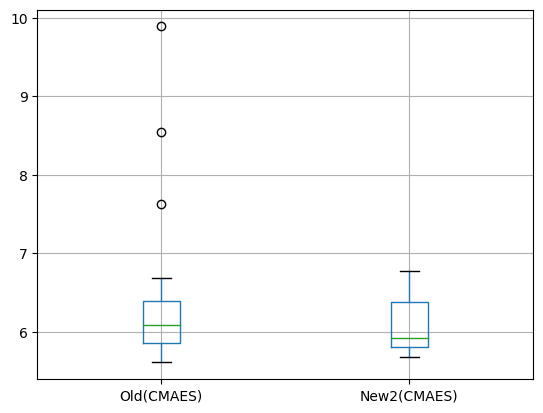

In [6]:
all_evals_grn5 = pd.DataFrame({'Old(CMAES)': cmaes_grn5_old_limits_evals, 'New2(CMAES)': cmaes_grn5_new_limits2_evals})
all_evals_grn5.boxplot(column=['Old(CMAES)', 'New2(CMAES)'])
plt.show()

### Comparando: CMAES (limites antigos), CMAES (novos limites), DE (novos limites)

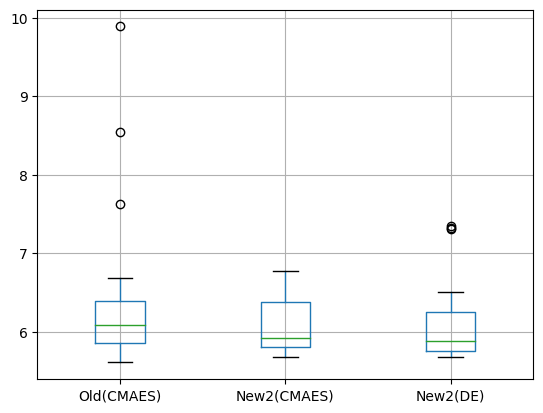

In [7]:
all_evals_grn5 = pd.DataFrame({'Old(CMAES)': cmaes_grn5_old_limits_evals,'New2(CMAES)': cmaes_grn5_new_limits2_evals, 'New2(DE)': de_grn5_new_limits2_evals})
all_evals_grn5.boxplot(column=['Old(CMAES)', 'New2(CMAES)', 'New2(DE)'])
plt.show()

### Comparando só CMAES (novos limites), DE (novos limites)

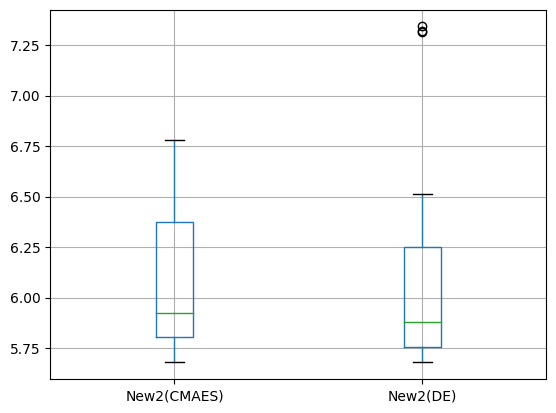

In [8]:
all_evals_grn5 = pd.DataFrame({'New2(CMAES)': cmaes_grn5_new_limits2_evals, 'New2(DE)': de_grn5_new_limits2_evals})
all_evals_grn5.boxplot(column=['New2(CMAES)', 'New2(DE)'])
plt.show()

# GRN com 10 variáveis

In [9]:
# carrega os dados
cmaes_grn10_old_limits = pd.read_csv('../results/GRN10-CMAES-1050000.csv')
cmaes_grn10_new_limits = pd.read_csv('../results/GRN10-CMAES-1050000-new-limits.csv')
cmaes_grn10_new_limits2 = pd.read_csv('../results/GRN10-CMAES-1050000-new-limits2.csv')
de_grn10_new_limits2 = pd.read_csv('../results/GRN10-DE-1050000-new-limits2.csv')

# calcula as estatísticas da coluna 'eval'
cmaes_grn10_old_limits_eval_desc = cmaes_grn10_old_limits.describe()['eval']
cmaes_grn10_new_limits_eval_desc = cmaes_grn10_new_limits.describe()['eval']
cmaes_grn10_new_limits2_eval_desc = cmaes_grn10_new_limits2.describe()['eval']
de_grn10_new_limits2_eval_desc = de_grn10_new_limits2.describe()['eval']


In [10]:

desc = pd.DataFrame({'Old (CMAES)': cmaes_grn10_old_limits_eval_desc, 'new (CMAES)': cmaes_grn10_new_limits_eval_desc,
                     'new2 (CMAES)': cmaes_grn10_new_limits2_eval_desc, 'new2(DE)': de_grn10_new_limits2_eval_desc})

desc


,Old (CMAES),new (CMAES),new2 (CMAES),new2(DE)
count,30.000000,30.000000,30.000000,60.000000
mean,13.944475,13.944475,14.043083,14.734900
std,0.267318,0.267318,0.255555,0.413288
min,13.515075,13.515075,13.557387,13.855013
25%,13.722589,13.722589,13.863837,14.532958
50%,13.965374,13.965374,14.074368,14.743553
75%,14.126715,14.126715,14.214643,14.933887
max,14.535801,14.535801,14.621877,16.216251


In [11]:
cmaes_grn10_old_limits_evals = cmaes_grn10_old_limits['eval']
cmaes_grn10_new_limits_evals = cmaes_grn10_new_limits['eval']
cmaes_grn10_new_limits2_evals = cmaes_grn10_new_limits2['eval']
de_grn10_new_limits2_evals = de_grn10_new_limits2['eval']

### Comparando novos limites (bem amplos) com os limites antigos (CMAES)

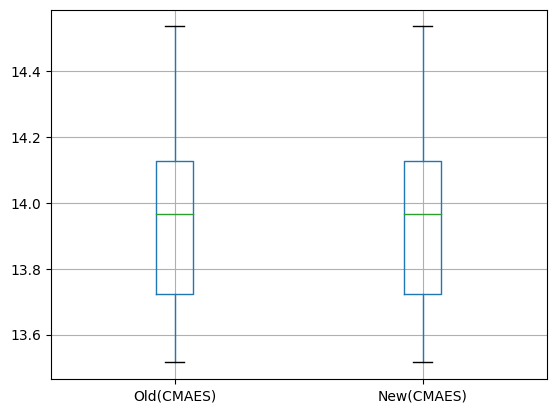

In [12]:
all_evals_grn10 = pd.DataFrame({'Old(CMAES)': cmaes_grn10_old_limits_evals, 'New(CMAES)': cmaes_grn10_new_limits_evals})
all_evals_grn10.boxplot(column=['Old(CMAES)', 'New(CMAES)'])
plt.show()

### Comparando novos limites com os limites antigos (CMAES)

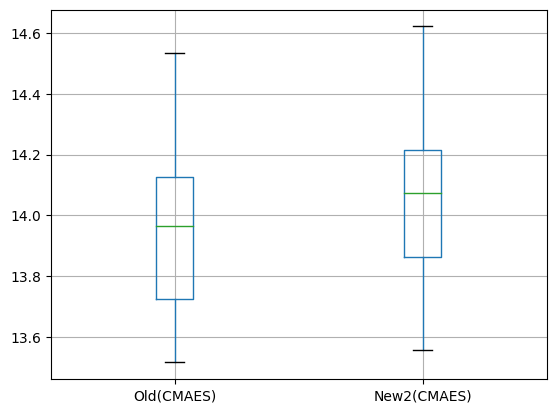

In [13]:
all_evals_grn10 = pd.DataFrame({'Old(CMAES)': cmaes_grn10_old_limits_evals, 'New2(CMAES)': cmaes_grn10_new_limits2_evals})
all_evals_grn10.boxplot(column=['Old(CMAES)', 'New2(CMAES)'])
plt.show()

In [14]:
### Comparando: CMAES (limites antigos), CMAES (novos limites), DE (novos limites)

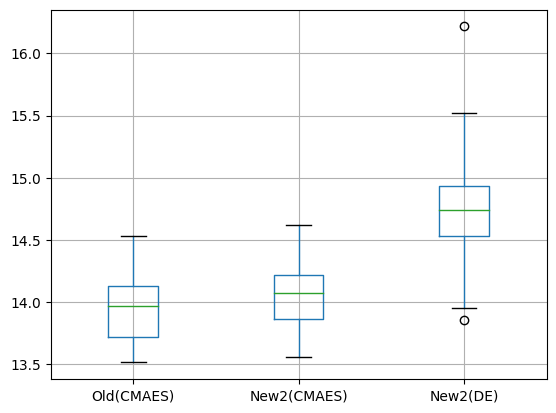

In [15]:
all_evals_grn10 = pd.DataFrame({'Old(CMAES)': cmaes_grn10_old_limits_evals, 'New2(CMAES)': cmaes_grn10_new_limits2_evals,
                               'New2(DE)': de_grn10_new_limits2_evals})
all_evals_grn10.boxplot(column=['Old(CMAES)', 'New2(CMAES)', 'New2(DE)'])
plt.show()

In [16]:
### Comparando só CMAES (novos limites), DE (novos limites)

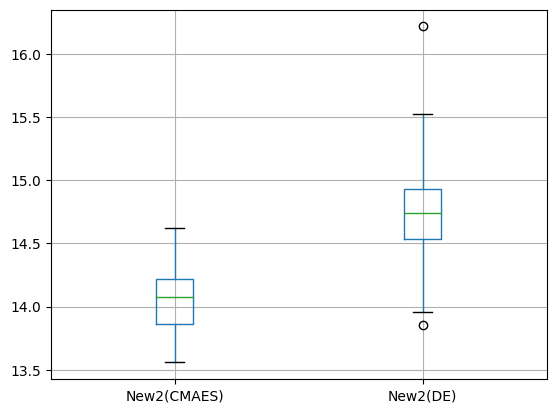

In [17]:
all_evals_grn10 = pd.DataFrame({'New2(CMAES)': cmaes_grn10_new_limits2_evals, 'New2(DE)': de_grn10_new_limits2_evals})
all_evals_grn10.boxplot(column=['New2(CMAES)', 'New2(DE)'])
plt.show()